This worksheet is used to check and combine two streams of Met data, 2010-2013 from Anna L and 2014-2016 from Nathan Wales.

*author: Ethan Coon*

In [1]:
import numpy as np
import scipy.signal as sc
import h5py
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
d1 = h5py.File("Barrow-2010_2013.h5",'r')
d2 = h5py.File("Barrow-2014_2016.h5",'r')

[  4.32000000e+04   1.29600000e+05   2.16000000e+05 ...,   9.06768000e+07
   9.07632000e+07   9.08496000e+07]
[u'air temperature [K]', u'incoming longwave radiation [W m^-2]', u'incoming shortwave radiation [W m^-2]', u'precipitation rain [m s^-1]', u'precipitation snow [m SWE s^-1]', u'relative humidity [-]', u'time [s]', u'wind speed [m s^-1]', u'wind speed reference height [m]']


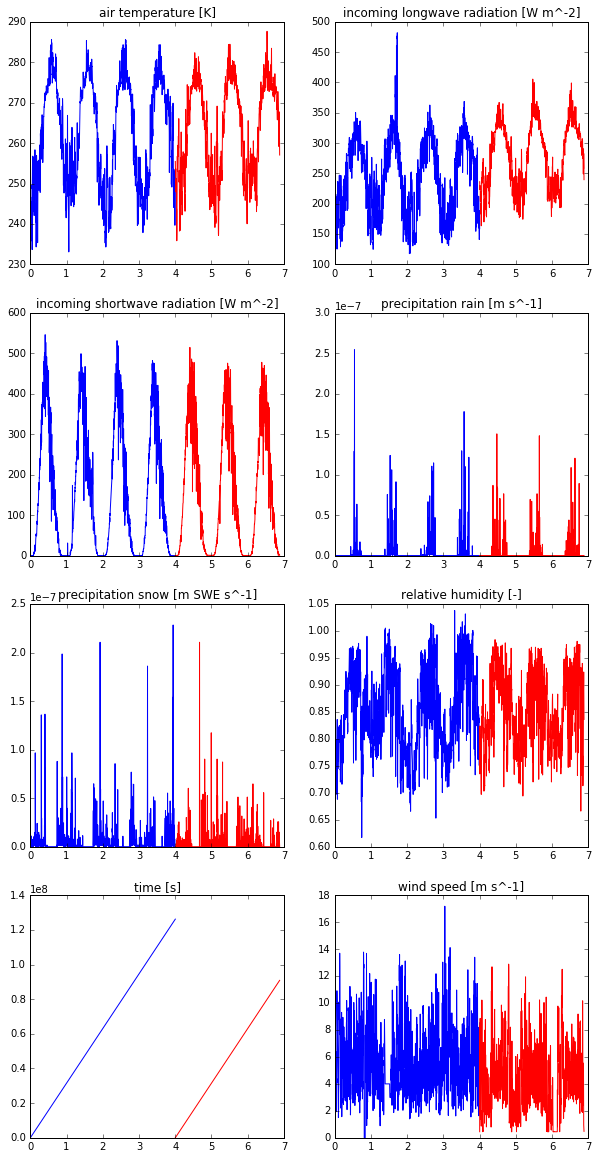

In [3]:
fax = plt.subplots(4,2,figsize=(10,20))
ax = fax[1].ravel()

print d2['time [s]'][:]

print d1.keys()
for i,k in enumerate([k for k in d1.keys() if not "reference height" in k]):
    ax[i].plot(d1['time [s]'][:]/86400.0/365.0, d1[k][:], 'b')
    ax[i].plot(4+(d2['time [s]'][:]/86400.0/365.0), d2[k][:], 'r')
    ax[i].set_title(k)

plt.show()

In [6]:
n1=365
n2=2*365
np.shape(d2['time [s]'][n1:n2])

(365,)

In [27]:
n1=365
n2=2*365
# also just save the record
with h5py.File("Barrow-2015.h5",'w') as out:
    out.create_dataset("time [s]", data=d2['time [s]'][n1:n2])
    out.create_dataset("air temperature [K]", data=d2['air temperature [K]'][n1:n2])
    out.create_dataset("relative humidity [-]", data=d2['relative humidity [-]'][n1:n2])
    out.create_dataset("precipitation rain [m s^-1]", data=d2['precipitation rain [m s^-1]'][n1:n2])
    out.create_dataset("precipitation snow [m SWE s^-1]", data=d2['precipitation snow [m SWE s^-1]'][n1:n2])
    out.create_dataset("incoming shortwave radiation [W m^-2]", data=d2['incoming shortwave radiation [W m^-2]'][n1:n2])
    out.create_dataset("incoming longwave radiation [W m^-2]", data=d2['incoming longwave radiation [W m^-2]'][n1:n2])
    out.create_dataset("wind speed [m s^-1]", data=d2['wind speed [m s^-1]'][n1:n2])
    out.attrs.create("wind speed reference height [m]", data=1.8) # fix me

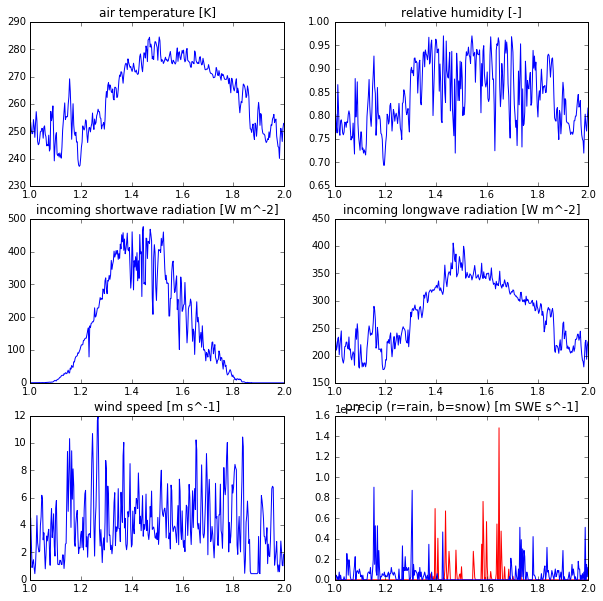

In [32]:
plot_met.plot_met("Barrow-2015.h5")
plt.show()

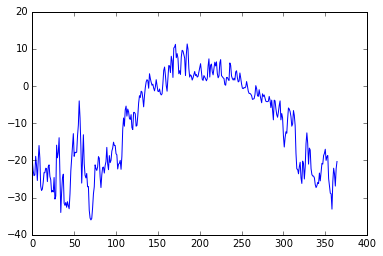

In [34]:
plt.plot(d2['air temperature [K]'][n1:n2]-273.15)

In [4]:
print "rel hum min = ", d1['relative humidity [-]'][:].min(), d2['relative humidity [-]'][:].min()
print "precip rain min = ", d1['precipitation rain [m s^-1]'][:].min(), d2['precipitation rain [m s^-1]'][:].min()
print "precip snow min = ", d1['precipitation snow [m SWE s^-1]'][:].min(), d2['precipitation snow [m SWE s^-1]'][:].min()
print "qSW min = ", d1['incoming shortwave radiation [W m^-2]'][:].min(), d2['incoming shortwave radiation [W m^-2]'][:].min()  
print "qLW min = ", d1['incoming longwave radiation [W m^-2]'][:].min(), d2['incoming longwave radiation [W m^-2]'][:].min()  
print "wind speed min = ", d1['wind speed [m s^-1]'][:].min(), d2['wind speed [m s^-1]'][:].min()

rel hum min =  0.61693109809 0.666
precip rain min =  0.0 0.0
precip snow min =  0.0 0.0
qSW min =  0.0 0.0
qLW min =  117.758181424 163.6708333
wind speed min =  0.0 0.45


In [6]:
with h5py.File("Barrow-2010_2016.h5",'w') as fid:
    for k in d1.keys():
        if k.startswith("time"):
            fid.create_dataset(k, data=np.concatenate([d1[k][:], 4*365.25*86400 + d2[k][:]]))
        elif k.startswith("wind speed reference height"):
            pass
        else:
            fid.create_dataset(k, data=np.concatenate([d1[k][:], d2[k][:]]))


In [7]:
d3 = h5py.File("Barrow-2010_2016.h5",'r')
print d3['precipitation rain [m s^-1]']

<HDF5 dataset "precipitation rain [m s^-1]": shape (2513,), type "<f8">


In [8]:
d1.close() 
d2.close()
d3.close()

[  4.32000000e+04   1.29600000e+05   2.16000000e+05 ...,   9.06768000e+07
   9.07632000e+07   9.08496000e+07]
[u'air temperature [K]', u'incoming longwave radiation [W m^-2]', u'incoming shortwave radiation [W m^-2]', u'precipitation rain [m s^-1]', u'precipitation snow [m SWE s^-1]', u'relative humidity [-]', u'time [s]', u'wind speed [m s^-1]', u'wind speed reference height [m]']


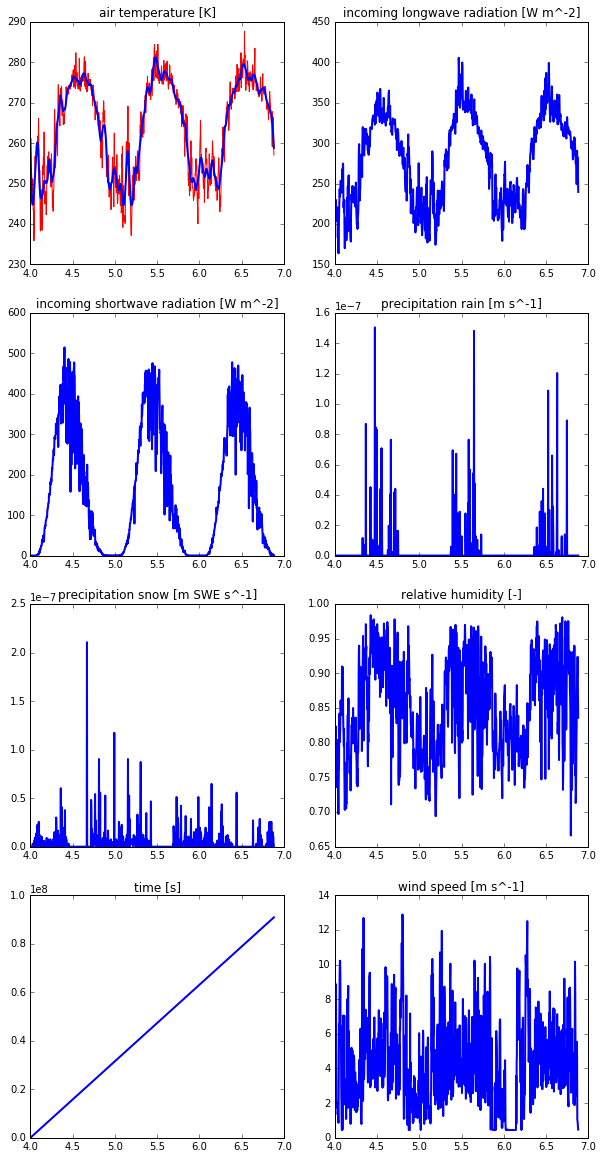

In [70]:
fax = plt.subplots(4,2,figsize=(10,20))
ax = fax[1].ravel()

print d2['time [s]'][:]
n=len(d2['time [s]'][:])
s=(8,n)
yy=np.zeros(s)

print d1.keys()
for i,k in enumerate([k for k in d1.keys() if not "reference height" in k]):
    ax[i].plot(4+(d2['time [s]'][:]/86400.0/365.0), d2[k][:], 'r')
    #print i
    if i==0:
        yy[i,:]=sc.savgol_filter(d2[k][:], 51, 4)
    else: 
        yy[i,:]=d2[k][:]
    ax[i].plot(4+(d2['time [s]'][:]/86400.0/365.0), yy[i,:], 'b',linewidth=2)
    ax[i].set_title(k)


    #plt.show()

In [61]:
    out.create_dataset("time [s]", data=stime)
    out.create_dataset("air temperature [K]", data=yy[0,:])
    out.create_dataset("relative humidity [-]", data=yy[5,:])
    out.create_dataset("precipitation rain [m s^-1]", data=yy[3,:])
    out.create_dataset("precipitation snow [m SWE s^-1]", data=yy[4,:])
    out.create_dataset("incoming shortwave radiation [W m^-2]", data=yy[2:])
    out.create_dataset("incoming longwave radiation [W m^-2]", data=yy[1,:])
    out.create_dataset("wind speed [m s^-1]", data=yy[7,:])
    out.attrs.create("wind speed reference height [m]", data=1.8) # fix me

[[  2.60991210e+02   2.57212529e+02   2.54034042e+02 ...,   2.61092848e+02
    2.60007221e+02   2.58804285e+02]
 [  2.57843687e+02   2.43745861e+02   2.31888559e+02 ...,   2.61194396e+02
    2.56458580e+02   2.51148255e+02]
 [  1.29811612e-01   5.66638558e-02   4.92995248e-03 ...,   1.89178930e+00
    2.42638673e+00   3.15263404e+00]
 ..., 
 [  8.32896376e-01   8.10880959e-01   7.92634870e-01 ...,   8.60278316e-01
    8.60719006e-01   8.60385455e-01]
 [  4.32000000e+04   1.29600000e+05   2.16000000e+05 ...,   9.06768000e+07
    9.07632000e+07   9.08496000e+07]
 [  6.46102738e+00   5.80260231e+00   5.25282422e+00 ...,   1.40264629e+00
    6.60551713e-01  -1.86712040e-01]]


In [64]:
yy[6,:]

array([  4.32000000e+04,   1.29600000e+05,   2.16000000e+05, ...,
         9.06768000e+07,   9.07632000e+07,   9.08496000e+07])

In [39]:
d1.keys()[1]


u'incoming longwave radiation [W m^-2]'

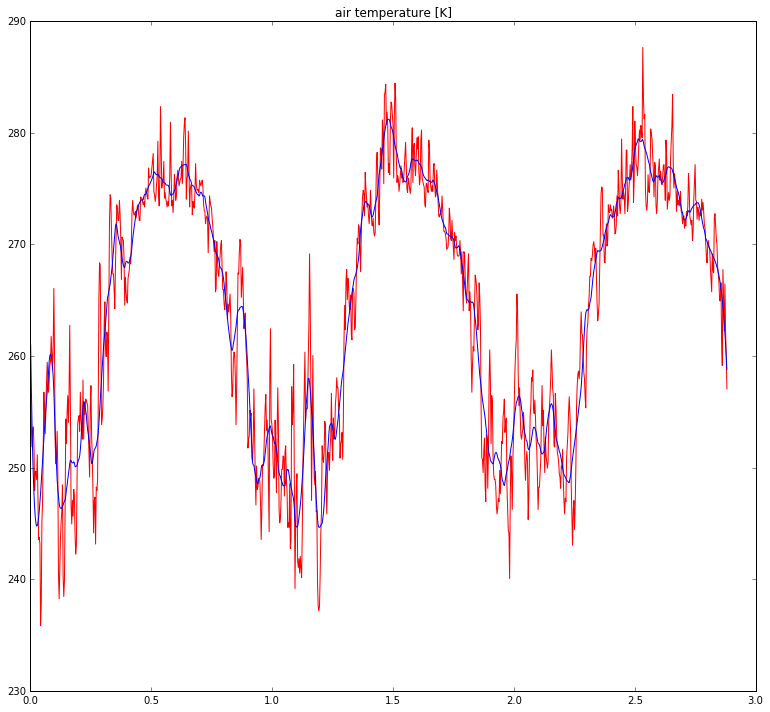

In [12]:
fig = plt.figure(1)
fig.set_figheight(12); fig.set_figwidth(13)
plt.plot((d2['time [s]'][:]/86400.0/365.0), d2[d1.keys()[0]][:], 'r')
yhat = sc.savgol_filter(d2[d1.keys()[0]][:], 51, 4) # window size 51, polynomial order 3
#plt.plot(mat['x'])
plt.plot((d2['time [s]'][:]/86400.0/365.0), yhat, 'b')
plt.title(d1.keys()[0])

<HDF5 dataset "time [s]": shape (3650,), type "<f8">
0 air temperature [K]
<HDF5 dataset "air temperature [K]": shape (3650,), type "<f8">
1 incoming longwave radiation [W m^-2]
<HDF5 dataset "incoming longwave radiation [W m^-2]": shape (3650,), type "<f8">
2 incoming shortwave radiation [W m^-2]
<HDF5 dataset "incoming shortwave radiation [W m^-2]": shape (3650,), type "<f8">
3 precipitation rain [m s^-1]
<HDF5 dataset "precipitation rain [m s^-1]": shape (3650,), type "<f8">
4 precipitation snow [m SWE s^-1]
<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (3650,), type "<f8">
5 relative humidity [-]
<HDF5 dataset "relative humidity [-]": shape (3650,), type "<f8">
6 time [s]
<HDF5 dataset "time [s]": shape (3650,), type "<f8">
7 wind speed [m s^-1]
<HDF5 dataset "wind speed [m s^-1]": shape (3650,), type "<f8">


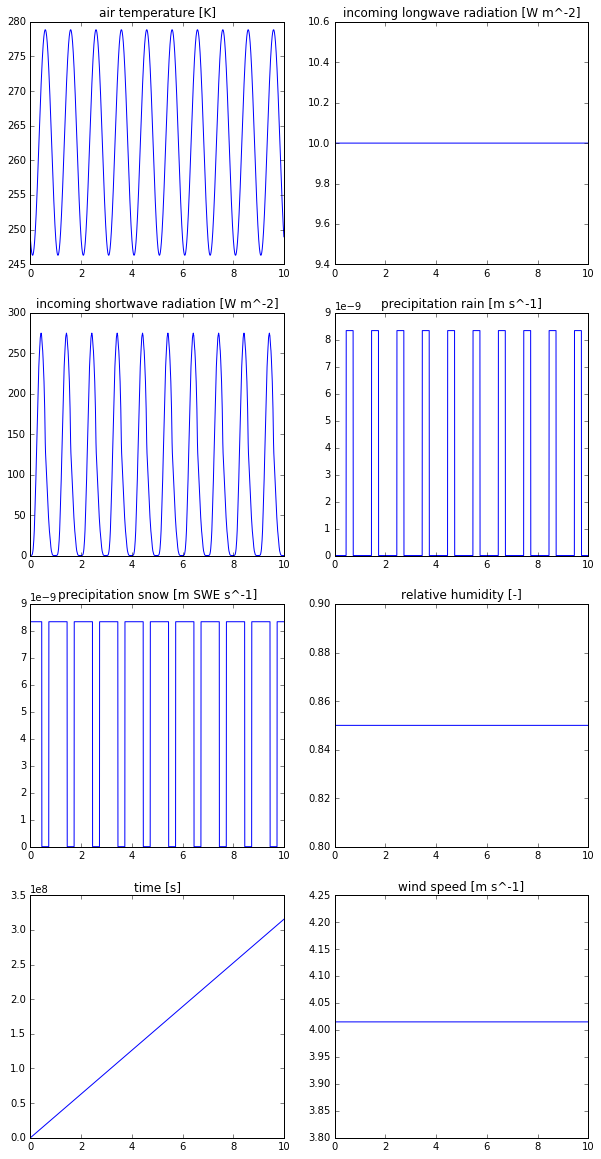

In [9]:
d = h5py.File("10yr-MORESNOW.h5",'r')
fax = plt.subplots(4,2,figsize=(10,20))
ax = fax[1].ravel()

print d['time [s]']

for i,k in enumerate([k for k in d.keys() if not "reference height" in k]):
    print i,k
    print d[k]
    ax[i].plot(d['time [s]'][:]/86400.0/365.0, d[k][:], 'b');
    ax[i].set_title(k);

In [31]:
# from $ATS_SRC_DIR/tools/utils
import sys,os
try:
    sys.path.append(os.path.join(os.environ["ATS_SRC_DIR"],"tools","utils"))
except KeyError:
    sys.path.append("/Users/ecoon/research/arctic/ats/ats/repos/dev/tools/utils/")
#    pass
import plot_met

In [10]:
nn=len(stime)
stime=d2['time [s]'][:]

Ta=d2[d1.keys()[0]][0:nn]
#Ta=d[d.keys()[0]][0:nn]
RH=d[d.keys()[5]][0:nn]
Pr=d[d.keys()[3]][0:nn]
Ps=d[d.keys()[4]][0:nn]
qSW=d[d.keys()[2]][0:nn]
sW = d[d.keys()[7]][0:nn]
lSW= d[d.keys()[1]][0:nn]

#Ta=d2[d1.keys()[0]][:]
#RH=d2[d1.keys()[5]][:]
#Pr=d2[d1.keys()[3]][:]
#Ps=d2[d1.keys()[4]][:]
#qSW=d2[d1.keys()[2]][:]
#sW = d2[d1.keys()[7]][:]
#lSW= d2[d1.keys()[1]][:]


# also just save the record
with h5py.File("Barrow-2014_2016_temp_met.h5",'w') as out:
    out.create_dataset("time [s]", data=stime)
    out.create_dataset("air temperature [K]", data=Ta)
    out.create_dataset("relative humidity [-]", data=RH)
    out.create_dataset("precipitation rain [m s^-1]", data=Pr)
    out.create_dataset("precipitation snow [m SWE s^-1]", data=Ps)
    out.create_dataset("incoming shortwave radiation [W m^-2]", data=qSW)
    out.create_dataset("incoming longwave radiation [W m^-2]", data=lSW)
    out.create_dataset("wind speed [m s^-1]", data=sW)
    out.attrs.create("wind speed reference height [m]", data=1.8) # fix me

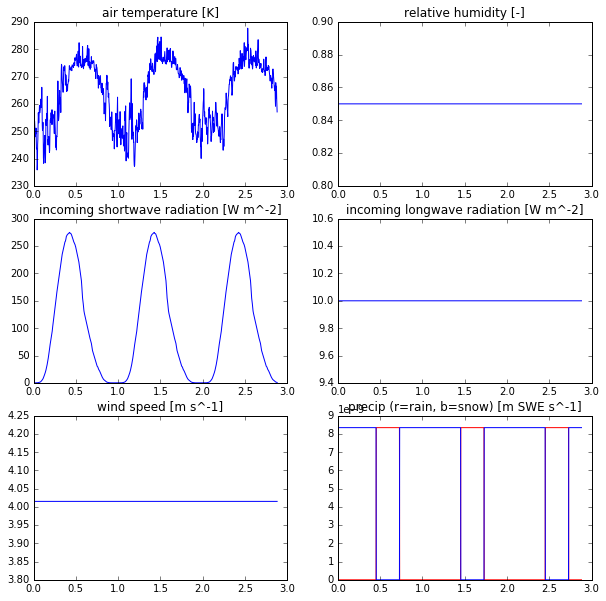

In [11]:
plot_met.plot_met("Barrow-2014_2016_temp_met.h5")
plt.show()

In [16]:
len(d2['time [s]'][:])

1052

In [6]:
ls *.h5

10yr-MORESNOW.h5              Barrow-2014_2016_temp.h5
Barrow-2010_2013.h5           Barrow2014_2016_filtered.h5
Barrow-2010_2016-updated.h5   spinup-10yr-T+6.h5
Barrow-2010_2016.h5           spinup-10yr-snowJan1.h5
Barrow-2014_2016.h5           spinup-10yr.h5
Barrow-2014_2016_filtered.h5


In [19]:
import scipy.io
mat = scipy.io.loadmat('test.mat')

(16460, 1)

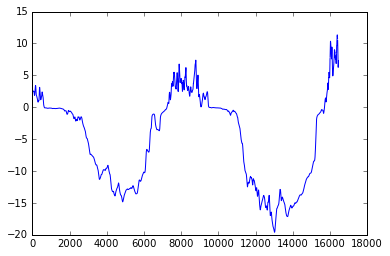

In [42]:
plt.plot(mat['x'],'b')
np.shape(mat['x'])

In [45]:
16460/(365*24)


1

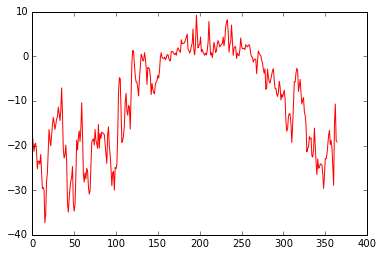

In [6]:
plt.plot( d2[d1.keys()[0]][0:365]-273.15, 'r')
np.savetxt('Barrow_2014_tempC.txt', d2[d1.keys()[0]][0:365]-273.15, fmt='%2.4e')
#plt.plot( d2[d1.keys()[4]][0:365]*100000000, 'b')